Text(0.5, 0.98, 'plt.subplots()')

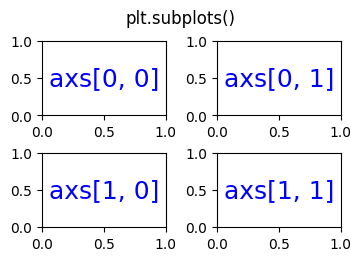

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5, 2.5),
                        layout="constrained")
# for each Axes, add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                            transform=axs[row, col].transAxes,
                            ha='center', va='center', fontsize=18,
                            color='blue')
fig.suptitle('plt.subplots()')

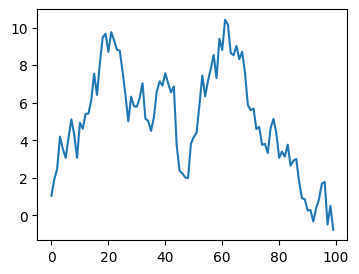

In [5]:
fig, ax = plt.subplots(figsize=(4, 3))
np.random.seed(19680801)
t = np.arange(100)
x = np.cumsum(np.random.randn(100))
lines = ax.plot(t, x)

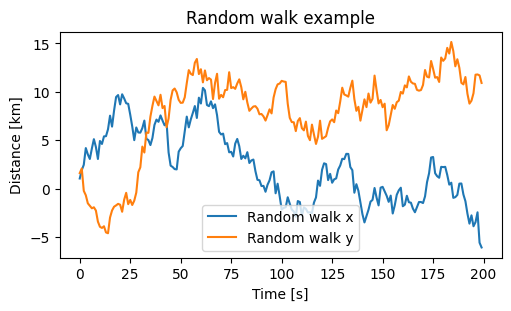

In [6]:
fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = np.cumsum(np.random.randn(200))
y = np.cumsum(np.random.randn(200))
linesx = ax.plot(t, x, label='Random walk x')
linesy = ax.plot(t, y, label='Random walk y')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Distance [km]')
ax.set_title('Random walk example')
ax.legend()

(20.0, 180.0)

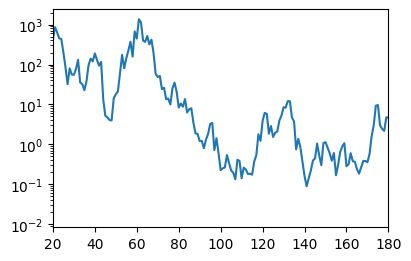

In [7]:
fig, ax = plt.subplots(figsize=(4, 2.5), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = 2**np.cumsum(np.random.randn(200))
linesx = ax.plot(t, x)
ax.set_yscale('log')
ax.set_xlim([20, 180])

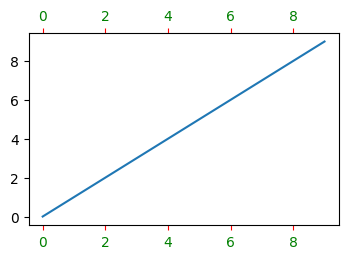

In [8]:
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(np.arange(10))
ax.tick_params(top=True, labeltop=True, color='red', axis='x',
               labelcolor='green')

Text(0.5, 1.0, 'aspect=3')

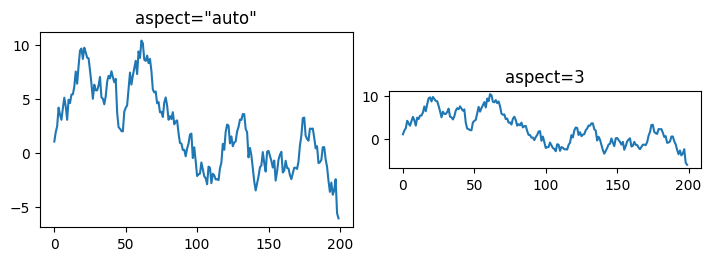

In [9]:
#Sometimes it is important to set the aspect ratio of a plot in data space, which we can do with set_aspect:
fig, axs = plt.subplots(ncols=2, figsize=(7, 2.5), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = np.cumsum(np.random.randn(200))
axs[0].plot(t, x)
axs[0].set_title('aspect="auto"')

axs[1].plot(t, x)
axs[1].set_aspect(3)
axs[1].set_title('aspect=3')

Text(0.5, 0.98, 'plt.subplots()')

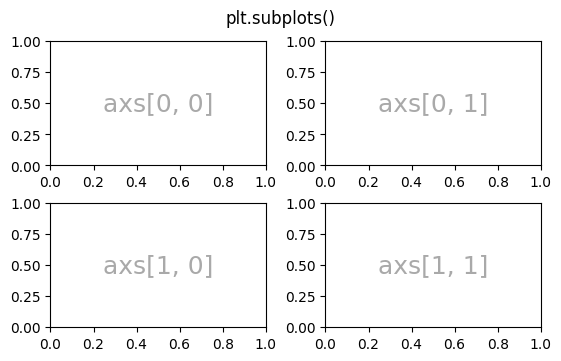

In [11]:
#We can create a basic 2-by-2 grid of Axes using subplots. It returns a Figure instance and an array of Axes objects. The Axes objects can be used to access methods to place artists on the Axes
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                               transform=axs[row, col].transAxes,
                               ha='center', va='center', fontsize=18,
                               color='darkgrey')
fig.suptitle('plt.subplots()')

In [12]:
#Annotation encapsulation
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

Text(0.5, 0.98, 'plt.subplot_mosaic()')

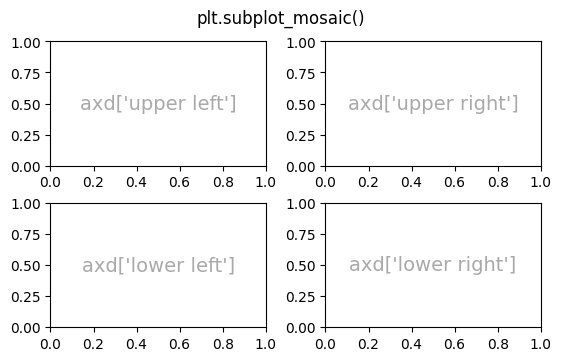

In [13]:
fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower left', 'lower right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

Text(0.5, 0.98, 'Fixed aspect Axes')

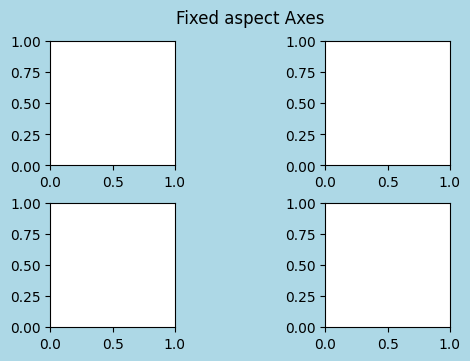

In [15]:
#Constrained layout
fig, axs = plt.subplots(2, 2, layout="constrained",
                        figsize=(5.5, 3.5), facecolor='lightblue')
for ax in axs.flat:
    ax.set_aspect(1)
fig.suptitle('Fixed aspect Axes')

Text(0.5, 0.98, 'Fixed aspect Axes: compressed')

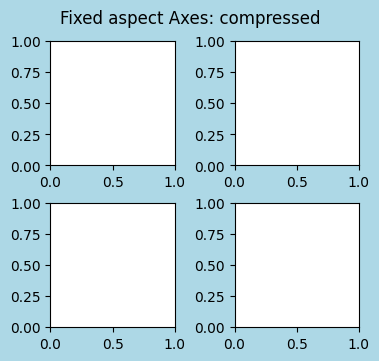

In [16]:
#Compressed layout
fig, axs = plt.subplots(2, 2, layout="compressed", figsize=(5.5, 3.5),
                        facecolor='lightblue')
for ax in axs.flat:
    ax.set_aspect(1)
fig.suptitle('Fixed aspect Axes: compressed')

Text(0.5, 0.98, 'plt.subplot_mosaic()')

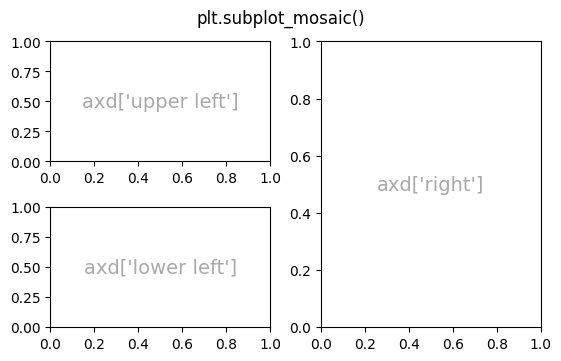

In [17]:
#Sometimes we want Axes to span rows or columns of the grid. 
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

Text(0.5, 0.98, 'plt.subplot_mosaic()')

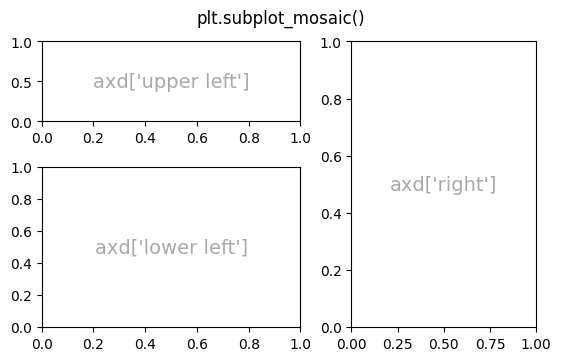

In [18]:
'''
Both subplots and subplot_mosaic allow the rows in the grid to be different heights, 
and the columns to be different widths using the gridspec_kw keyword argument.
'''
gs_kw = dict(width_ratios=[1.4, 1], height_ratios=[1, 2])
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              gridspec_kw=gs_kw, figsize=(5.5, 3.5),
                              layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')


Text(0.02, 0.5, 'ylabel for subfigs[1]')

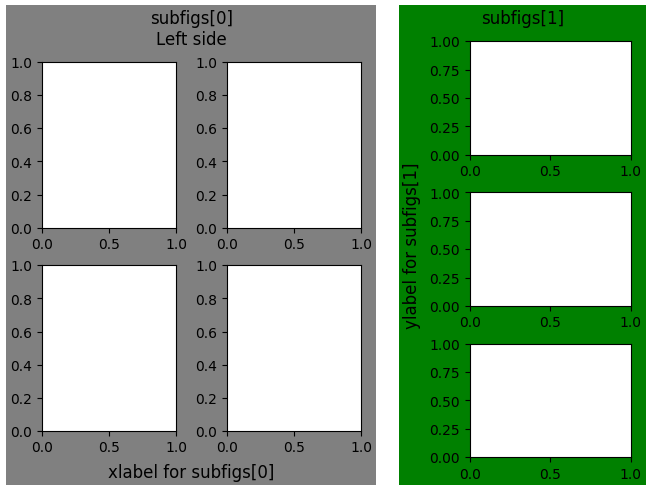

In [22]:
'''
Sometimes it is helpful to have two or more grids of Axes that may not need to be related to one another.
The most simple way to accomplish this is to use Figure.subfigures.
'''
fig = plt.figure(layout="constrained")
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(2, 2)
subfigs[0].set_facecolor('grey')
subfigs[0].suptitle('subfigs[0]\nLeft side')
subfigs[0].supxlabel('xlabel for subfigs[0]')

axs1 = subfigs[1].subplots(3, 1)
subfigs[1].set_facecolor('green')
subfigs[1].suptitle('subfigs[1]')
subfigs[1].supylabel('ylabel for subfigs[1]')

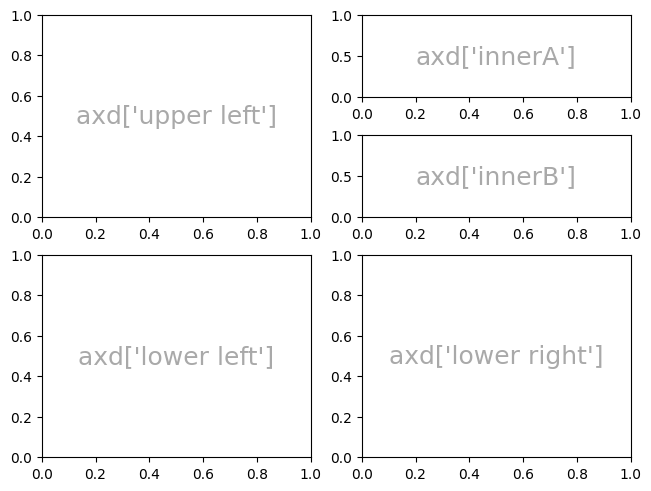

In [20]:
inner = [['innerA'],
         ['innerB']]
outer = [['upper left',  inner],
          ['lower left', 'lower right']]

fig, axd = plt.subplot_mosaic(outer, layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]')

Text(0.5, 0.98, 'Manually added subplots using add_gridspec')

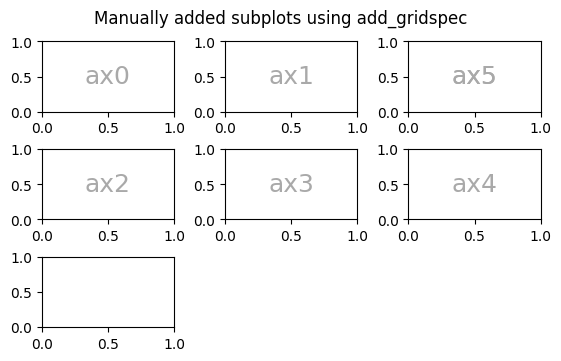

In [27]:
#We can accomplish a 2x2 grid in the same manner as plt.subplots(2, 2):
fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")
spec = fig.add_gridspec(ncols=3, nrows=3)

ax0 = fig.add_subplot(spec[0, 0])
annotate_axes(ax0, 'ax0')

ax1 = fig.add_subplot(spec[0, 1])
annotate_axes(ax1, 'ax1')

ax2 = fig.add_subplot(spec[1, 0])
annotate_axes(ax2, 'ax2')

ax3 = fig.add_subplot(spec[1, 1])
annotate_axes(ax3, 'ax3')

ax4 = fig.add_subplot(spec[1, 2])
annotate_axes(ax4, 'ax4')

ax5 = fig.add_subplot(spec[0, 2])
annotate_axes(ax5, 'ax5')

ax6 = fig.add_subplot(spec[2, 0])
annotate_axes(ax5, 'ax5')

fig.suptitle('Manually added subplots using add_gridspec')

Text(0.5, 0.98, 'Manually added subplots, spanning a column')

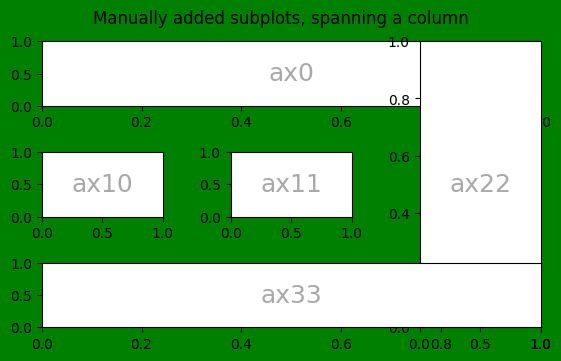

In [35]:
'''
We can index the spec array using NumPy slice syntax and the new Axes will span the slice.
This would be the same as fig, axd = plt.subplot_mosaic([['ax0', 'ax0'], ['ax1', 'ax2']], ...)
'''
fig = plt.figure(figsize=(5.5, 3.5), layout="constrained", facecolor='green')
spec = fig.add_gridspec(3, 3)

ax0 = fig.add_subplot(spec[0, :])
annotate_axes(ax0, 'ax0')

ax10 = fig.add_subplot(spec[1, 0])
annotate_axes(ax10, 'ax10')

ax11 = fig.add_subplot(spec[1, 1])
annotate_axes(ax11, 'ax11')

ax22 = fig.add_subplot(spec[:, 2])
annotate_axes(ax22, 'ax22')

ax33 = fig.add_subplot(spec[2, :])
annotate_axes(ax33, 'ax33')

fig.suptitle('Manually added subplots, spanning a column')


Text(0.5, 0.98, 'Manual gridspec with right=0.75')

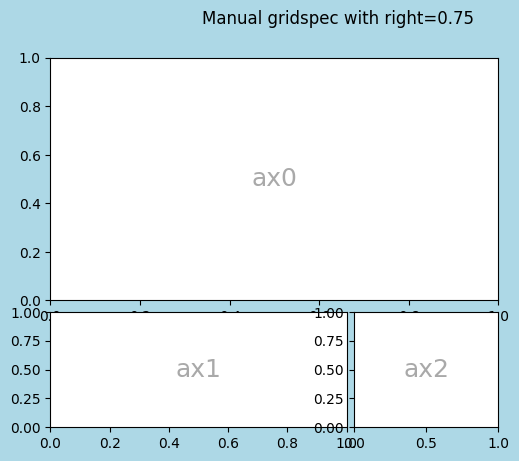

In [36]:
#Manual adjustments to a GridSpec layout
fig = plt.figure(layout=None, facecolor='lightblue')
gs = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.75,
                      hspace=0.1, wspace=0.05)
ax0 = fig.add_subplot(gs[:-1, :])
annotate_axes(ax0, 'ax0')
ax1 = fig.add_subplot(gs[-1, :-1])
annotate_axes(ax1, 'ax1')
ax2 = fig.add_subplot(gs[-1, -1])
annotate_axes(ax2, 'ax2')
fig.suptitle('Manual gridspec with right=0.75')

Text(0.5, 0.98, 'nested gridspecs')

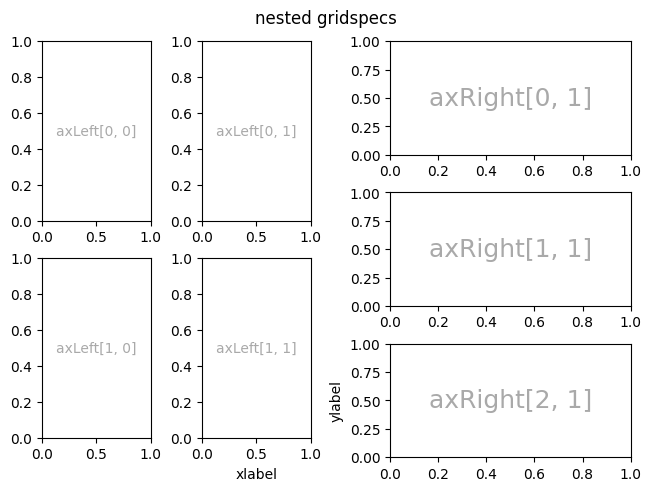

In [37]:
#You can create nested layout similar to subfigures using subgridspec
fig = plt.figure(layout="constrained")
gs0 = fig.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 2)
gs01 = gs0[1].subgridspec(3, 1)

for a in range(2):
    for b in range(2):
        ax = fig.add_subplot(gs00[a, b])
        annotate_axes(ax, f'axLeft[{a}, {b}]', fontsize=10)
        if a == 1 and b == 1:
            ax.set_xlabel('xlabel')
for a in range(3):
    ax = fig.add_subplot(gs01[a])
    annotate_axes(ax, f'axRight[{a}, {b}]')
    if a == 2:
        ax.set_ylabel('ylabel')

fig.suptitle('nested gridspecs')

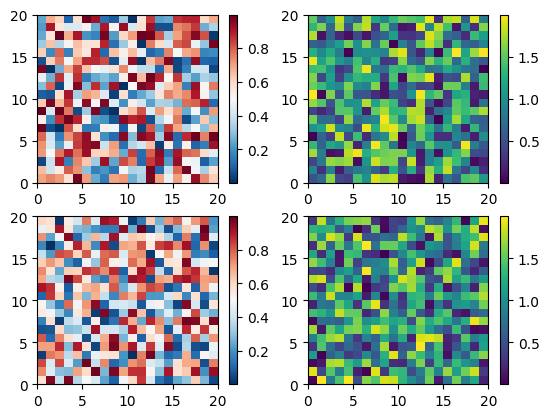

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)

Text(0.5, 0.98, "layout='constrained'")

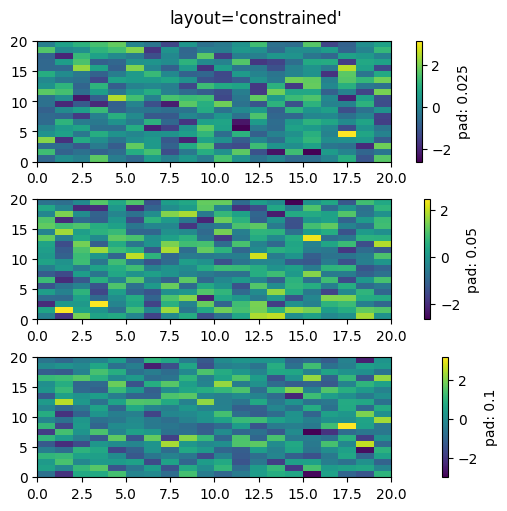

In [39]:
#Adjusting the spacing between colorbars and parent Axes
fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(5, 5))
for ax, pad in zip(axs, [0.025, 0.05, 0.1]):
    pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
    fig.colorbar(pcm, ax=ax, pad=pad, label=f'pad: {pad}')
fig.suptitle("layout='constrained'")

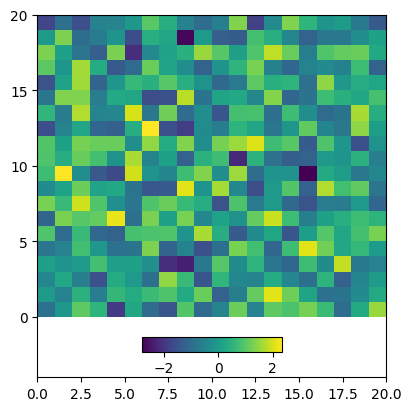

In [40]:
'''
Using inset_axes:>
We can manually create any type of Axes for the colorbar to use, 
but an Axes.inset_axes is useful because it is a child of the parent Axes and can be positioned relative to the parent.
'''
fig, ax = plt.subplots(layout='constrained', figsize=(4, 4))
pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
ax.set_ylim([-4, 20])
cax = ax.inset_axes([0.3, 0.07, 0.4, 0.04])
fig.colorbar(pcm, cax=cax, orientation='horizontal')

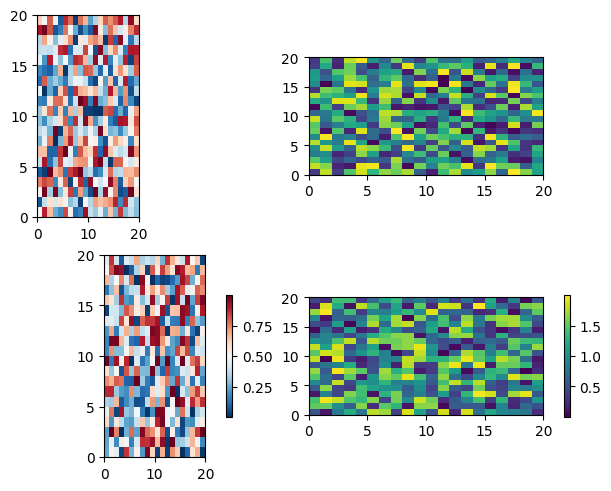

In [41]:
'''
Colorbars attached to fixed-aspect-ratio Axes
Placing colorbars for Axes with a fixed aspect ratio pose a particular challenge as the parent Axes changes size depending on the data view.
'''
fig, axs = plt.subplots(2, 2,  layout='constrained')
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        if col == 0:
            ax.set_aspect(2)
        else:
            ax.set_aspect(1/2)
        if row == 1:
            fig.colorbar(pcm, ax=ax, shrink=0.6)

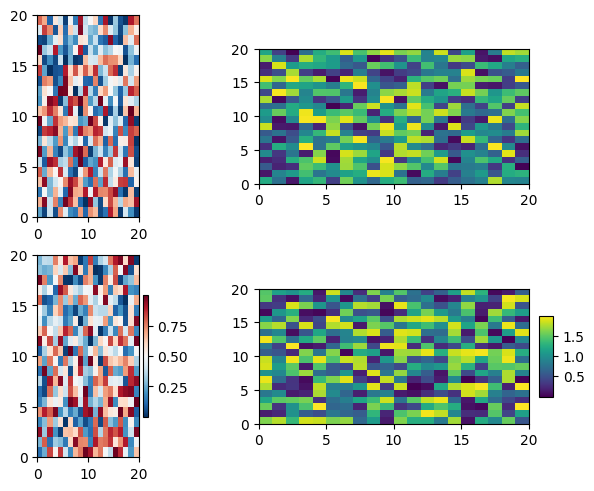

In [42]:
#We solve this problem using Axes.inset_axes to locate the Axes in "axes coordinates"
fig, axs = plt.subplots(2, 2, layout='constrained')
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        if col == 0:
            ax.set_aspect(2)
        else:
            ax.set_aspect(1/2)
        if row == 1:
            cax = ax.inset_axes([1.04, 0.2, 0.05, 0.6])
            fig.colorbar(pcm, cax=cax)

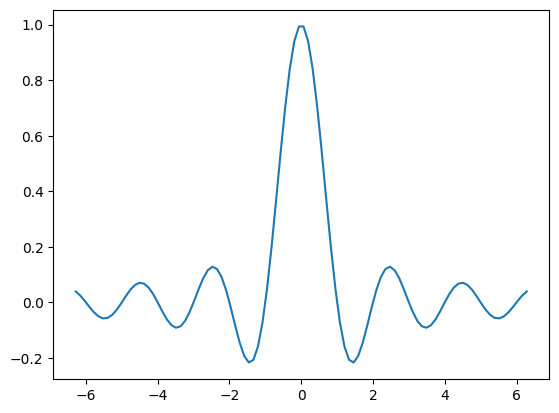

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sinc(x)

fig, ax = plt.subplots()
ax.plot(x, y)

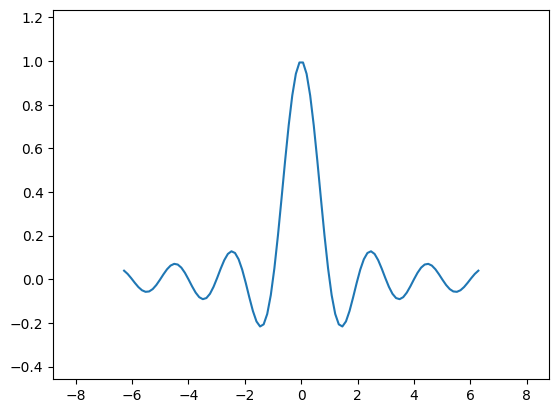

In [2]:
#overriding margins to make them larger or smaller
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(0.2, 0.2)

Text(0.5, 1.0, 'margins(0.2)')

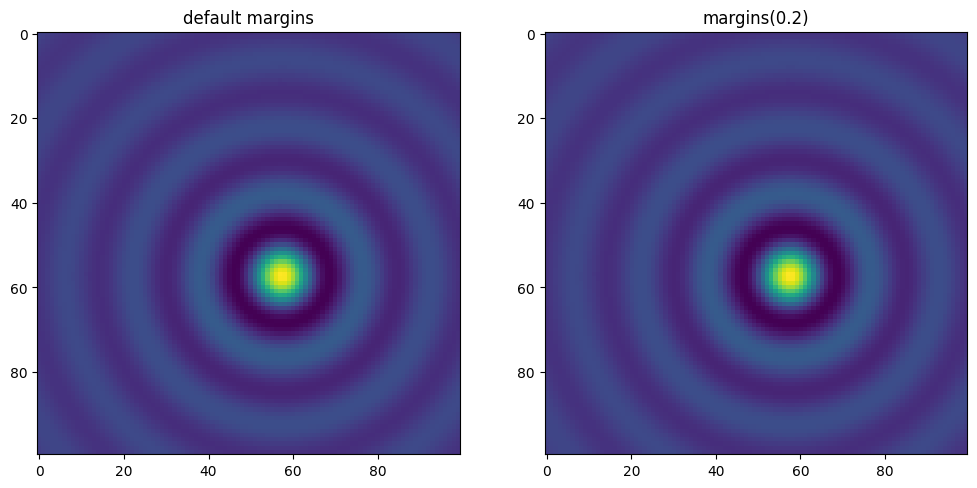

In [4]:
'''
Sticky edges
sticky edges are a feature of Axes and Artist objects that prevents data points from being cut off or placed too close to the edges of the plot.
This behavior ensures better readability and alignment for elements like bar charts, scatter plots, or text annotations.
'''
xx, yy = np.meshgrid(x, x)
zz = np.sinc(np.sqrt((xx - 1)**2 + (yy - 1)**2))

fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].imshow(zz)
ax[0].set_title("default margins")
ax[1].imshow(zz)
ax[1].margins(0.2)
ax[1].set_title("margins(0.2)")

Text(0.5, 1.0, 'default use_sticky_edges\nmargins(-0.2)')

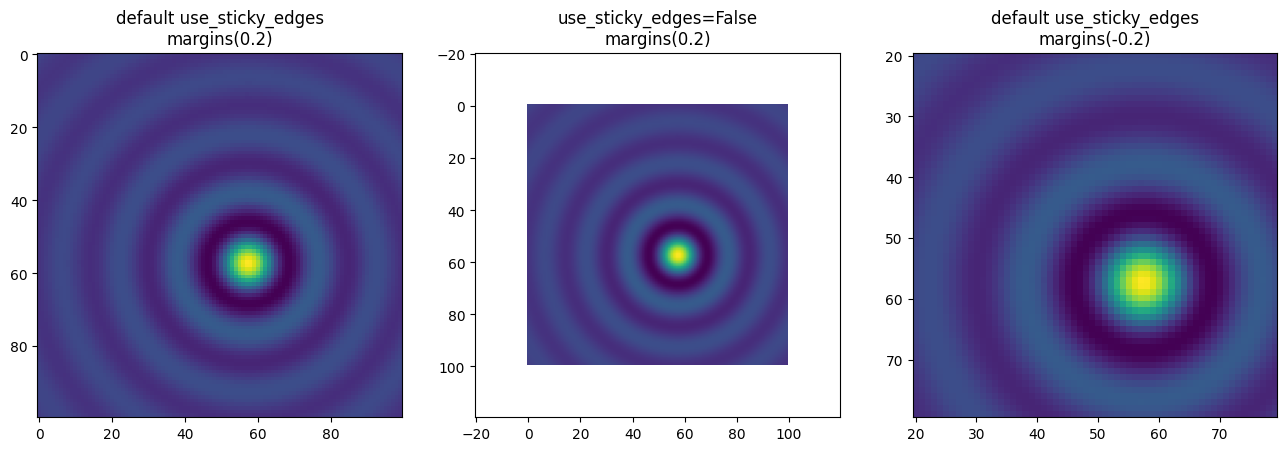

In [5]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 10))
ax[0].imshow(zz)
ax[0].margins(0.2)
ax[0].set_title("default use_sticky_edges\nmargins(0.2)")
ax[1].imshow(zz)
ax[1].margins(0.2)
ax[1].use_sticky_edges = False
ax[1].set_title("use_sticky_edges=False\nmargins(0.2)")
ax[2].imshow(zz)
ax[2].margins(-0.2)
ax[2].set_title("default use_sticky_edges\nmargins(-0.2)")

Text(0, 0.5, 'log')

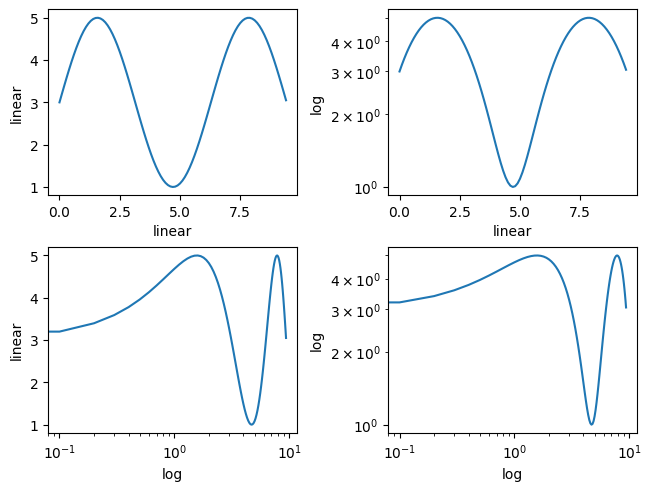

In [6]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.scale as mscale
from matplotlib.ticker import FixedLocator, NullFormatter

fig, axs = plt.subplot_mosaic([['linear', 'linear-log'],
                               ['log-linear', 'log-log']], layout='constrained')

x = np.arange(0, 3*np.pi, 0.1)
y = 2 * np.sin(x) + 3

ax = axs['linear']
ax.plot(x, y)
ax.set_xlabel('linear')
ax.set_ylabel('linear')

ax = axs['linear-log']
ax.plot(x, y)
ax.set_yscale('log')
ax.set_xlabel('linear')
ax.set_ylabel('log')

ax = axs['log-linear']
ax.plot(x, y)
ax.set_xscale('log')
ax.set_xlabel('log')
ax.set_ylabel('linear')

ax = axs['log-log']
ax.plot(x, y)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log')
ax.set_ylabel('log')

In [7]:
#other scales
print(mscale.get_scale_names())

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']


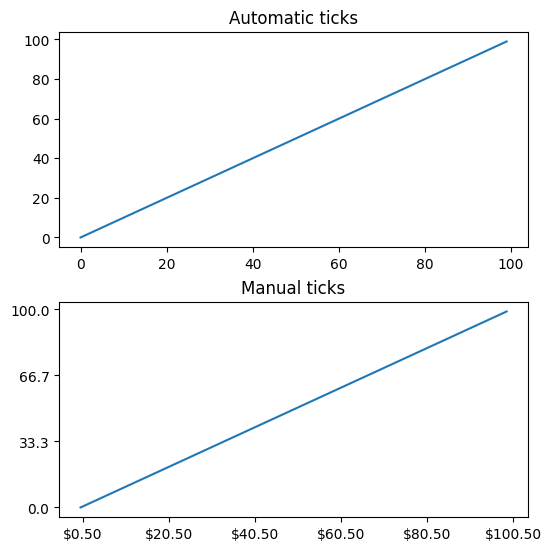

In [8]:

import matplotlib.ticker as ticker


fig, axs = plt.subplots(2, 1, figsize=(5.4, 5.4), layout='constrained')
x = np.arange(100)
for nn, ax in enumerate(axs):
    ax.plot(x, x)
    if nn == 1:
        ax.set_title('Manual ticks')
        ax.set_yticks(np.arange(0, 100.1, 100/3))
        xticks = np.arange(0.50, 101, 20)
        xlabels = [f'\\${x:1.2f}' for x in xticks]
        ax.set_xticks(xticks, labels=xlabels)
    else:
        ax.set_title('Automatic ticks')

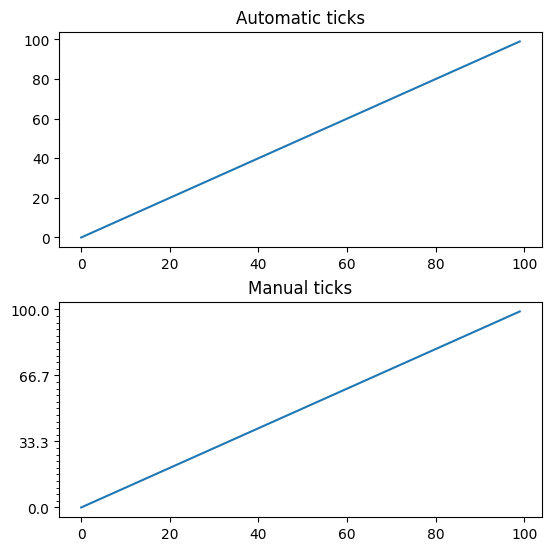

In [9]:
#Adding minor ticks since major ones are edded by default
fig, axs = plt.subplots(2, 1, figsize=(5.4, 5.4), layout='constrained')
x = np.arange(100)
for nn, ax in enumerate(axs):
    ax.plot(x, x)
    if nn == 1:
        ax.set_title('Manual ticks')
        ax.set_yticks(np.arange(0, 100.1, 100/3))
        ax.set_yticks(np.arange(0, 100.1, 100/30), minor=True)
    else:
        ax.set_title('Automatic ticks')

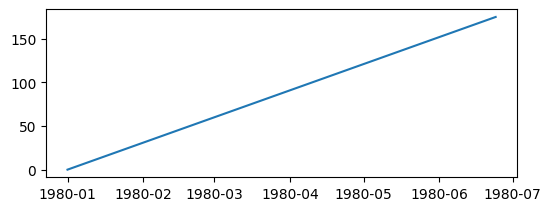

In [10]:
import numpy as np

import matplotlib.dates as mdates
import matplotlib.units as munits

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5.4, 2), layout='constrained')
time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
x = np.arange(len(time))
ax.plot(time, x)

Text(0.5, 0, '1980')

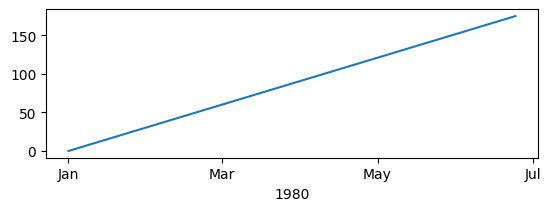

In [11]:
fig, ax = plt.subplots(figsize=(5.4, 2), layout='constrained')
time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
x = np.arange(len(time))
ax.plot(time, x)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=np.arange(1, 13, 2)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xlabel('1980')

Text(0.5, 0.98, 'Categorical Plotting')

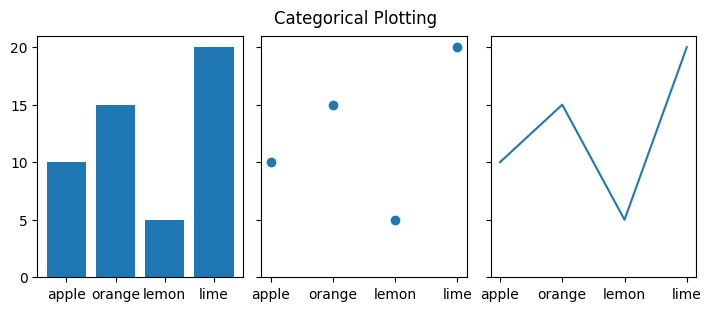

In [12]:
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(7, 3), sharey=True, layout='constrained')
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

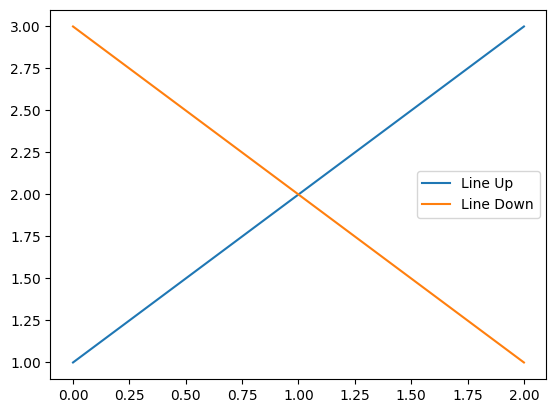

In [13]:
#Renaming legends
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2')
line_down, = ax.plot([3, 2, 1], label='Line 1')
ax.legend([line_up, line_down], ['Line Up', 'Line Down'])

In [14]:
'''
If the handles are not directly accessible, for example when using some Third-party packages,
they can be accessed via Axes.get_legend_handles_labels.
'''
my_map = {'Line Up':'Up', 'Line Down':'Down'}

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [my_map[l] for l in labels])

KeyError: 'Line 2'

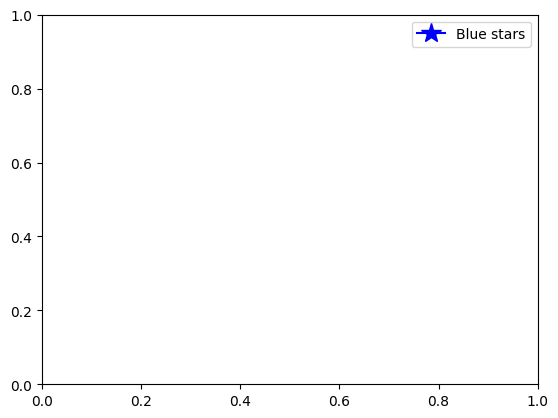

In [15]:
import matplotlib.lines as mlines

fig, ax = plt.subplots()
blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')
ax.legend(handles=[blue_line])

plt.show()

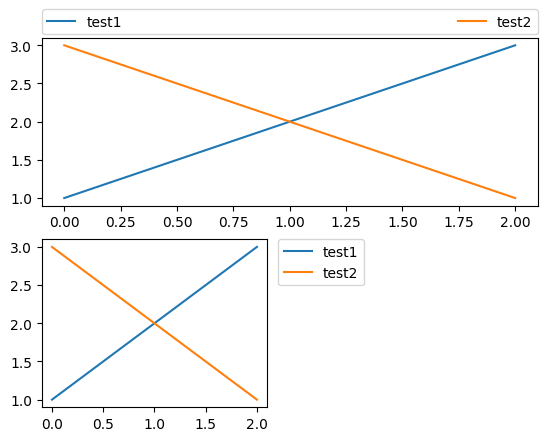

In [16]:
#The location of the legend can be specified by the keyword argument loc.
fig, ax_dict = plt.subplot_mosaic([['top', 'top'], ['bottom', 'BLANK']],
                                  empty_sentinel="BLANK")
ax_dict['top'].plot([1, 2, 3], label="test1")
ax_dict['top'].plot([3, 2, 1], label="test2")
# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
ax_dict['top'].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncols=2, mode="expand", borderaxespad=0.)

ax_dict['bottom'].plot([1, 2, 3], label="test1")
ax_dict['bottom'].plot([3, 2, 1], label="test2")
# Place a legend to the right of this smaller subplot.
ax_dict['bottom'].legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

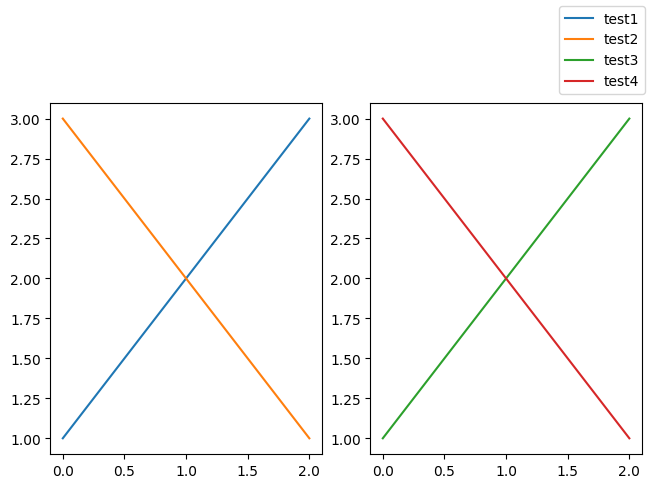

In [17]:
fig, axs = plt.subplot_mosaic([['left', 'right']], layout='constrained')

axs['left'].plot([1, 2, 3], label="test1")
axs['left'].plot([3, 2, 1], label="test2")

axs['right'].plot([1, 2, 3], 'C2', label="test3")
axs['right'].plot([3, 2, 1], 'C3', label="test4")
# Place a legend to the right of this smaller subplot.
fig.legend(loc='outside upper right')

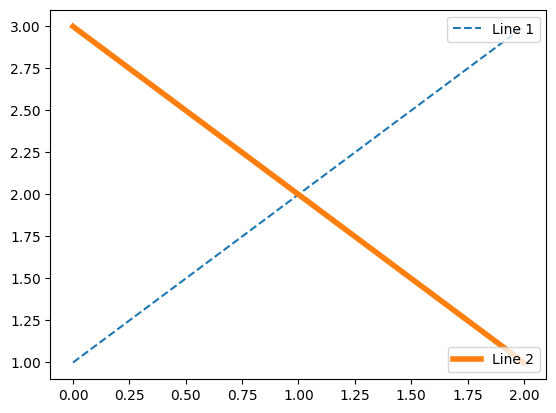

In [18]:
#Multiple legends on the same axis
fig, ax = plt.subplots()
line1, = ax.plot([1, 2, 3], label="Line 1", linestyle='--')
line2, = ax.plot([3, 2, 1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = ax.legend(handles=[line1], loc='upper right')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Create another legend for the second line.
ax.legend(handles=[line2], loc='lower right')

plt.show()

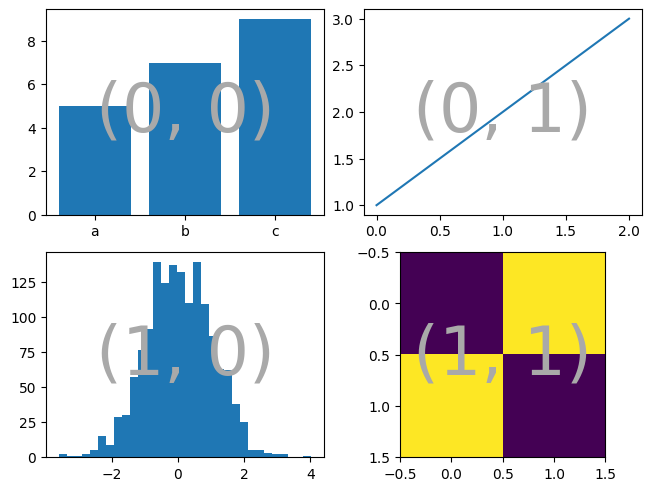

In [20]:
import matplotlib.pyplot as plt
import numpy as np


# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)
np.random.seed(19680801)
hist_data = np.random.randn(1_500)


fig = plt.figure(layout="constrained")
ax_array = fig.subplots(2, 2, squeeze=False)

ax_array[0, 0].bar(["a", "b", "c"], [5, 7, 9])
ax_array[0, 1].plot([1, 2, 3])
ax_array[1, 0].hist(hist_data, bins="auto")
ax_array[1, 1].imshow([[1, 2], [2, 1]])

identify_axes(
    {(j, k): a for j, r in enumerate(ax_array) for k, a in enumerate(r)},
)

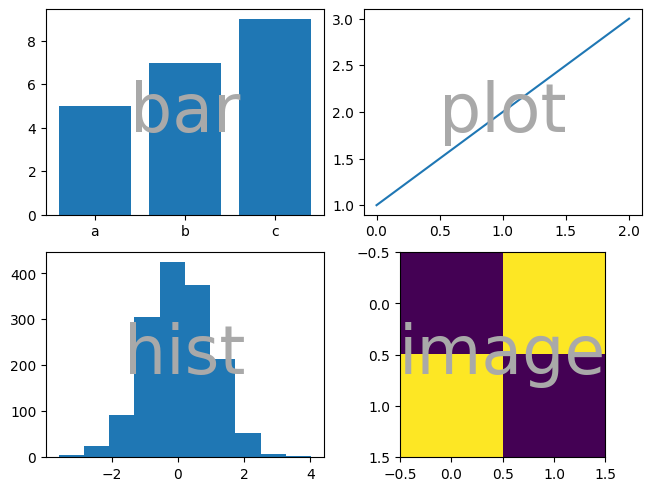

In [21]:
#Using Figure.subplot_mosaic we can produce the same mosaic but give the Axes semantic names
fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic(
    [
        ["bar", "plot"],
        ["hist", "image"],
    ],
)
ax_dict["bar"].bar(["a", "b", "c"], [5, 7, 9])
ax_dict["plot"].plot([1, 2, 3])
ax_dict["hist"].hist(hist_data)
ax_dict["image"].imshow([[1, 2], [2, 1]])
identify_axes(ax_dict)

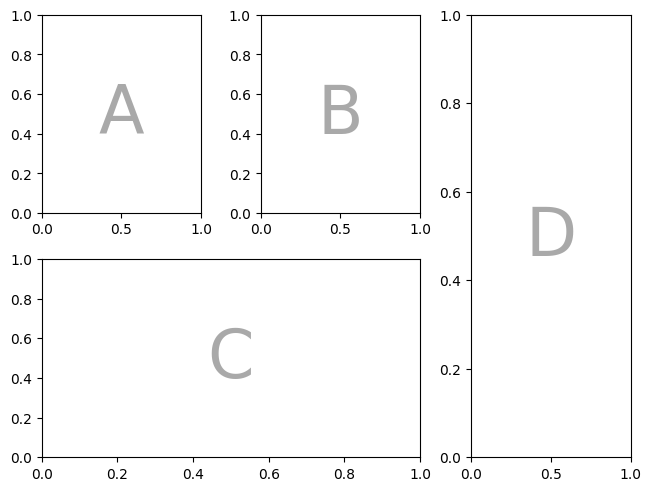

In [22]:
#Axes spanning multiple rows/columns
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    ABD
    CCD
    """
)
identify_axes(axd)

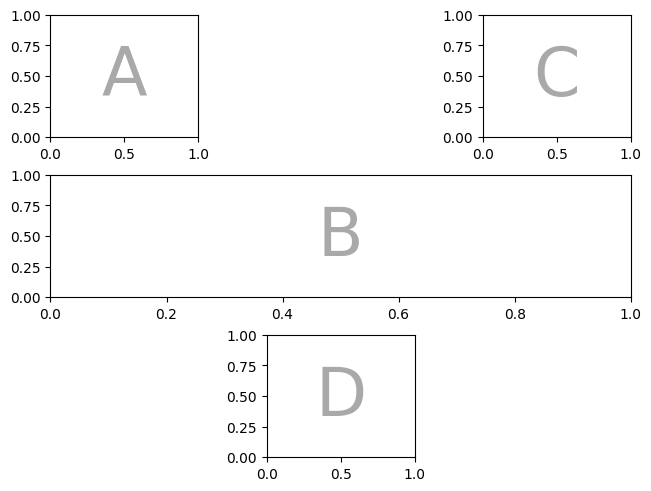

In [23]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    A.C
    BBB
    .D.
    """
)
identify_axes(axd)

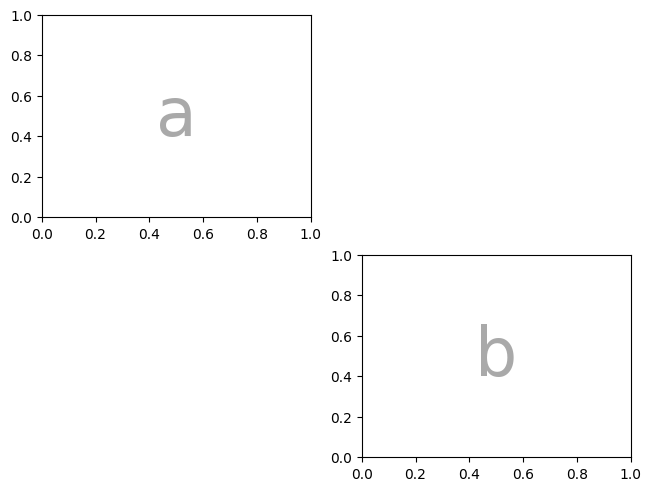

In [24]:
#If we prefer to use another character (rather than a period ".") to mark the empty space, we can use empty_sentinel to specify the character to use.
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    aX
    Xb
    """,
    empty_sentinel="X",
)
identify_axes(axd)

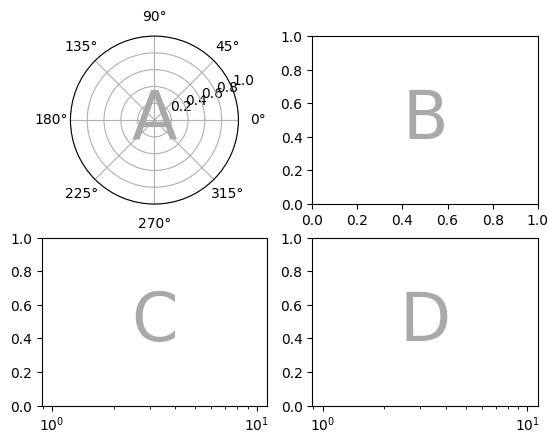

In [25]:
fig, axd = plt.subplot_mosaic(
    "AB;CD",
    per_subplot_kw={
        "A": {"projection": "polar"},
        ("C", "D"): {"xscale": "log"}
    },
)
identify_axes(axd)

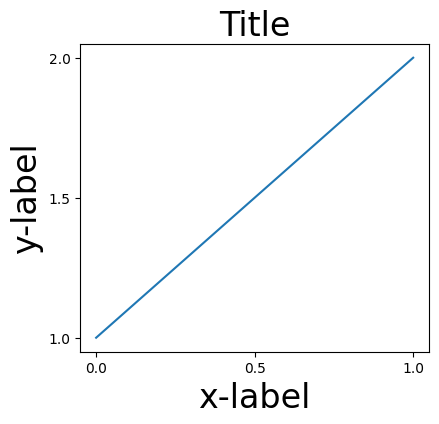

In [26]:
#Layout = none
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 4.5, 4.
plt.rcParams['figure.max_open_warning'] = 50


def example_plot(ax, fontsize=12, hide_labels=False):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    if hide_labels:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    else:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)

fig, ax = plt.subplots(layout=None)
example_plot(ax, fontsize=24)

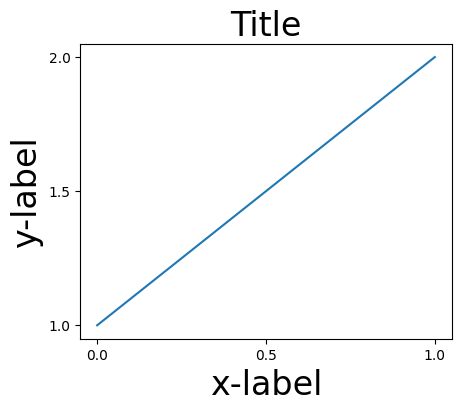

In [27]:
fig, ax = plt.subplots(layout="constrained")
example_plot(ax, fontsize=24)

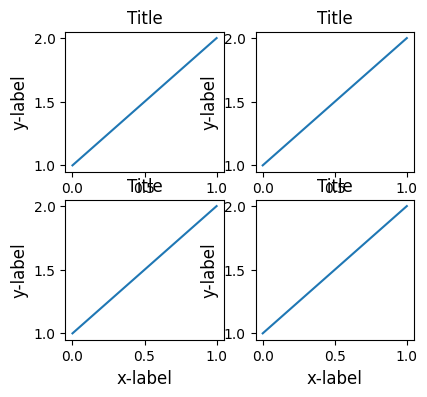

In [28]:
#Layout = none
fig, axs = plt.subplots(2, 2, layout=None)
for ax in axs.flat:
    example_plot(ax)

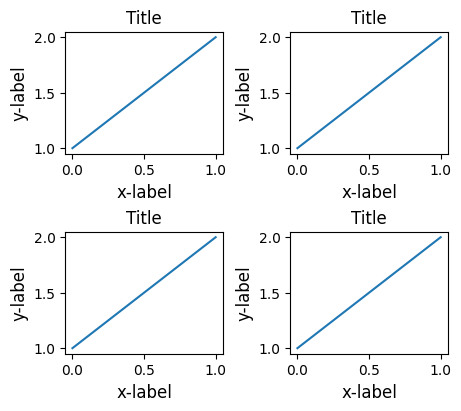

In [29]:
#Layout = constrained
fig, axs = plt.subplots(2, 2, layout="constrained")
for ax in axs.flat:
    example_plot(ax)

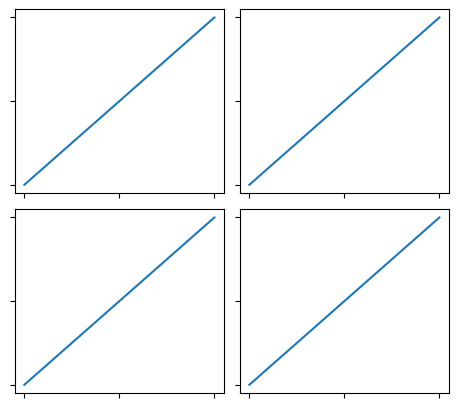

In [30]:
'''
Padding and spacing
Padding between Axes is controlled in the horizontal by w_pad and wspace, and vertical by h_pad and hspace.
These can be edited via set. w/h_pad are the minimum space around the Axes in units of inches:
'''
fig, axs = plt.subplots(2, 2, layout="constrained")
for ax in axs.flat:
    example_plot(ax, hide_labels=True)
fig.get_layout_engine().set(w_pad=4 / 72, h_pad=4 / 72, hspace=0,
                            wspace=0)

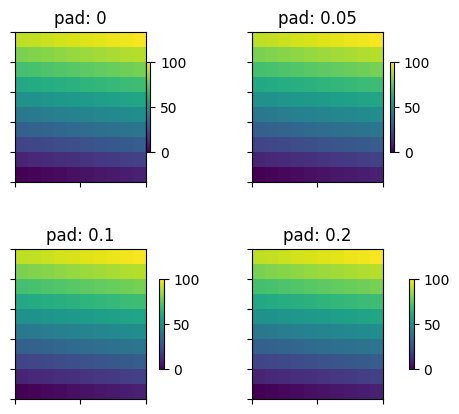

In [35]:
arr = np.arange(100).reshape((10, 10))
norm = mcolors.Normalize(vmin=0., vmax=100.)
pc_kwargs = {'rasterized': True, 'cmap': 'viridis', 'norm': norm}
fig, axs = plt.subplots(2, 2, layout="constrained")
pads = [0, 0.05, 0.1, 0.2]
for pad, ax in zip(pads, axs.flat):
    pc = ax.pcolormesh(arr, **pc_kwargs)
    fig.colorbar(pc, ax=ax, shrink=0.6, pad=pad)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(f'pad: {pad}')
fig.get_layout_engine().set(w_pad=2 / 72, h_pad=2 / 72, hspace=0.2,
                            wspace=0.2)

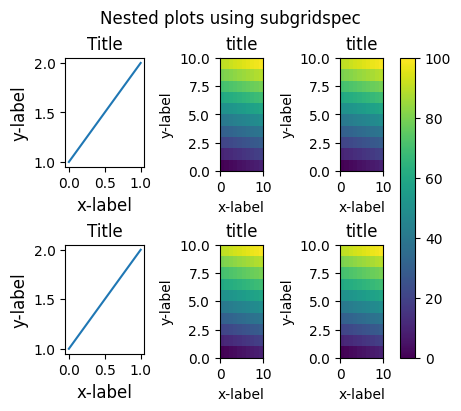

In [37]:
'''
This example uses two gridspecs to have the colorbar only pertain to one set of pcolors.
Note how the left column is wider than the two right-hand columns because of this.
Of course, if you wanted the subplots to be the same size you only needed one gridspec.
'''
fig = plt.figure(layout="constrained")
gs0 = fig.add_gridspec(1, 2, figure=fig, width_ratios=[1, 2])
gs_left = gs0[0].subgridspec(2, 1)
gs_right = gs0[1].subgridspec(2, 2)

for gs in gs_left:
    ax = fig.add_subplot(gs)
    example_plot(ax)
axs = []
for gs in gs_right:
    ax = fig.add_subplot(gs)
    pcm = ax.pcolormesh(arr, **pc_kwargs)
    ax.set_xlabel('x-label')
    ax.set_ylabel('y-label')
    ax.set_title('title')
    axs += [ax]
fig.suptitle('Nested plots using subgridspec')
fig.colorbar(pcm, ax=axs)

Text(0.5, 0.98, 'Nested plots using subfigures')

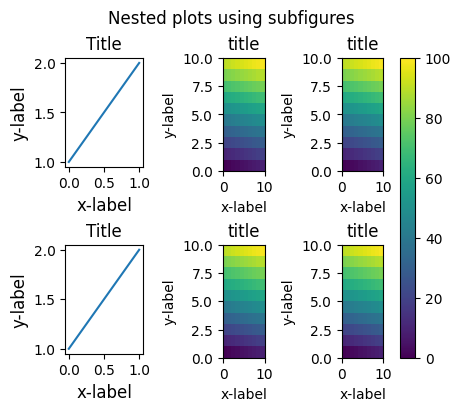

In [38]:
#Rather than using subgridspecs, Matplotlib now provides subfigures which also work with constrained layout
fig = plt.figure(layout="constrained")
sfigs = fig.subfigures(1, 2, width_ratios=[1, 2])

axs_left = sfigs[0].subplots(2, 1)
for ax in axs_left.flat:
    example_plot(ax)

axs_right = sfigs[1].subplots(2, 2)
for ax in axs_right.flat:
    pcm = ax.pcolormesh(arr, **pc_kwargs)
    ax.set_xlabel('x-label')
    ax.set_ylabel('y-label')
    ax.set_title('title')
fig.colorbar(pcm, ax=axs_right)
fig.suptitle('Nested plots using subfigures')